# Imports

In [3]:
# Data Processing
import pandas as pd

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# ML Algorithm
from sklearn.ensemble import VotingClassifier 

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support

# Visualization
from matplotlib import pyplot as plt

# Saving the Model
import pickle

# Loads Data

In [4]:
df = pd.read_csv(r'C:/Users/Jake/Desktop/Notebooks/EPL Prediction Model/Data/Encoded_EPL_DataWithTime.csv')

# Had this column get created upon loading, just dropped it
df = df.drop(columns=["Unnamed: 0"]) 
df

,Season,Season Encoding,Date,YearOfSeason,Time,Time Encoding,HomeTeam,HomeTeam Encoding,AwayTeam,AwayTeam Encoding,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fall,0,12/09/2020,2020/21,Afternoon,0,Fulham,8,Arsenal,0,...,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,Fall,0,12/09/2020,2020/21,Late-Day,2,Crystal Palace,6,Southampton,21,...,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,Fall,0,12/09/2020,2020/21,Late-Day,2,Liverpool,13,Leeds,11,...,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,Fall,0,12/09/2020,2020/21,Late-Day,2,West Ham,28,Newcastle,17,...,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,Fall,0,13/09/2020,2020/21,Mid-Day,1,West Brom,27,Leicester,12,...,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Summer,3,26/07/2020,2019/20,Mid-Day,1,Leicester,12,Man United,15,...,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0
756,Summer,3,26/07/2020,2019/20,Mid-Day,1,Man City,14,Norwich,18,...,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0
757,Summer,3,26/07/2020,2019/20,Mid-Day,1,Newcastle,17,Liverpool,13,...,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0
758,Summer,3,26/07/2020,2019/20,Mid-Day,1,Southampton,21,Sheffield United,20,...,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0


# Splits the Data

In [5]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "YearOfSeason", "Time","Date", "HTHG","HTAG" ,"FTHG","FTAG" ,"HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])

# Labels
y = df["FTR Encoding"]

In [6]:
len(X.columns)

18

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scales the Data

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Loads Models

In [9]:
log_clf = pickle.load(open('LogisticRegression_TimeData_Model.sav', 'rb'))
forest_clf = pickle.load(open('RandomForest_TimeData_Model.sav', 'rb'))
knn_clf = pickle.load(open('KNN_TimeData_Model.sav', 'rb'))
nn_clf = pickle.load(open('MultiLayerPerceptron_TimeData_Model.sav', 'rb'))

# Create the Model & Train the Model

In [10]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', forest_clf), ('knn', knn_clf),  ('nn', nn_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

C:\Users\Jake\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 random_state=42, solver='sag',
                                                 tol=1000.0)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     min_samples_split=3,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=50,
                                                   weights='distance')),
                             ('nn',
                              MLPClassifier(activation='tanh', alpha=1e-05,
                                            hidden_layer_sizes=(25, 15),
   

In [11]:
results = voting_clf.predict(X_test)
results

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Evaluate the Model

In [12]:
for clf in (log_clf, forest_clf, nn_clf,knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.618421052631579
RandomForestClassifier 0.631578947368421


C:\Users\Jake\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier 0.631578947368421
KNeighborsClassifier 0.5855263157894737
VotingClassifier 0.625


C:\Users\Jake\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Confusion Matrix

Confusion matrix, without normalization
[[51  8  0]
 [13 41  1]
 [19 16  3]]


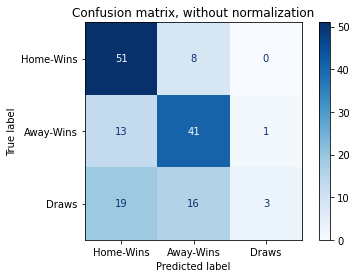

Normalized confusion matrix
[[0.86440678 0.13559322 0.        ]
 [0.23636364 0.74545455 0.01818182]
 [0.5        0.42105263 0.07894737]]


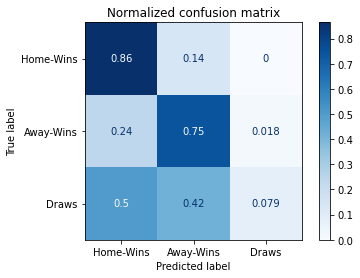

In [13]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=['Home-Wins', 'Away-Wins', 'Draws']


for title, normalize in titles_options:
    disp = plot_confusion_matrix(voting_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

##### Precision, Recall, F1

In [14]:
p_r_f = precision_recall_fscore_support(y_test, results, average='macro')
p_r_f

(0.665075687364844, 0.5629362311788717, 0.5148334451151352, None)

In [15]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.61      0.86      0.72        59
           1       0.63      0.75      0.68        55
           2       0.75      0.08      0.14        38

    accuracy                           0.62       152
   macro avg       0.67      0.56      0.51       152
weighted avg       0.65      0.62      0.56       152



##### R-Squared & Adjusted R-Squared

In [16]:
r2 = r2_score(y_train[:len(results)], results[:len(results)])
print("R^2: " + str(r2))

R^2: -0.5068921029401781


In [17]:
# n = number of sample size
# p = number of independent variables
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

adjusted_r2 = 1 - ((1-r2) * (len(results) - 1) / (len(results) - len(df.columns.tolist()) - 1) )
print('Adjusted R^2: ' + str(adjusted_r2))

Adjusted R^2: -0.9121067860837553


##### FPR & TPR Rates

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, results, pos_label=2)

In [19]:
fpr

array([0.        , 0.00877193, 0.43859649, 1.        ])

In [20]:
tpr

array([0.        , 0.07894737, 0.5       , 1.        ])

In [21]:
thresholds

array([3, 2, 1, 0], dtype=int64)

##### ROC Curve

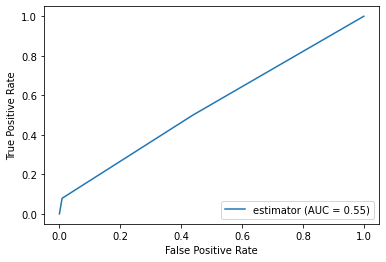

In [22]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          
                            estimator_name='estimator')
display.plot()  
plt.show()

# Test With a Recent Game

Game Used: Man City vs Chelsea FA Cup (4/17/2021) -- Chelsea won (ie the Home Team won)

Data came from these links and our data

* https://www.espn.com/soccer/matchstats?gameId=597190
* https://www.si.com/soccer/manchestercity/match-coverage/manchester-city-vs-chelsea-where-to-watch-team-news-referees-everything-you-need-to-know

In [23]:
list(X.columns) # The values we need to make a prediction

['Season Encoding',
 'Time Encoding',
 'HomeTeam Encoding',
 'AwayTeam Encoding',
 'Referee Encoding',
 'Fouls Called Per Game',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [24]:
len(X.columns)

18

In [25]:
# Data came from these links and our data

test_game = np.array([
    2, # 2 bc it took place in Spring
    0, # 0 bc kickoff was at 12:32 (rounds to 12:30)
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    23, # Mike Dean was the referee
    14, # got from our data
    5, # HS
    11, # AS
    3, # HST
    3, # AST
    8, # HF
    12, # AF
    3, # HC 
    6, #AC
    2, # HY
    3, # AY
    0, # HR
    0, # AR
            ]).reshape(1, -1)

result = voting_clf.predict(test_game)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[0]
Correct! Chelsea, the Home Team, won.


### Now Will Try It Using Averages (How it's designed to be used)

Note: Only used integer values, any decimal was cut off, there was no rounding (just floors the number). Eg, 16.75 would just be 16.

Data sources links:

* https://www.premierleague.com/stats/top/clubs/total_cross
* https://www.premierleague.com/clubs/4/Chelsea/stats?se=363
* https://www.premierleague.com/clubs/11/Manchester-City/stats?se=363

In [26]:
test_game_averages = np.array([
    2, # 2 bc it took place in Spring
    0, # 0 bc kickoff was at 12:32 (rounds to 12:30)
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    23, # Mike Dean was the referee
    14, # got from our data
    14, # Chelsea Shots per game avg
    15, # Man City Shots per game avg 
    5, # Chelsea Shots on target per game avg
    5, # Man City Shots on target per game avg 
    6, # Chelsea Fouls per game avg
    5, # Man City Fouls per game avg 
    20, # Chelsea Crosses per game avg
    16, # Man City Crosses per game avg 
    1, # Chelsea Yellow Cards per game avg
    1, # Man City Yellow Cards per game avg 
    0, # Chelsea Red Cards per game avg
    0, # Man City Red Cards per game avg 
]).reshape(1, -1)

result = voting_clf.predict(test_game_averages)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[0]
Correct! Chelsea, the Home Team, won.


# Saves the Model

In [27]:
filename = 'EnsembleMethod_TimeData_Model.sav'

In [28]:
pickle.dump(nn_clf, open(filename, 'wb'))